In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [44]:
End = '2017-11-05'

In [45]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [46]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

# Pierwszy trend L1

In [47]:
if Min_pozycja > Max_pozycja:
    
    print('ok')


#---------------------------------------------------------------------------------------------------------------------------- 
# L1, gdy Max_v znajduje się w ostatnich 20 dniach

elif Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-20:
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]+1:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() -100
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
 
 #---------------------------------------------------------------------------------------------------------------------------- 
 # L1, gdy Max_v znajduje się wcześniej nić 20 ostatnich dniach

elif Min_pozycja < Max_pozycja and Max_pozycja > len(df1)-20:
    
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=182))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego od połowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() -10
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Bx]
            Y_long = [Ay, By]
#----------------------------------------------------------------------------------------------------------------------------    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego od połowy
Punkt A:[17293.0, 1559.76001], Punkt C: [17465.0, 2255.7949138285767]


In [48]:
B

[17363.0, 1843.030029]

# Trend średni M1 lub L2

In [49]:
if Max_pozycja < len(df1)-20 and Min_pozycja < Max_pozycja:
    
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[Max_pozycja].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('rysujemy trend spadkowy Mid')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df2.index.max() -50
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long2 = [Ax, Cx]
            Y_long2 = [Ay, Cy]
#--------------------------------------------------------------------------------------------------------------------------
# Trend M1 - styczna pomocnicza od L1 i M2 styczna porządana od M2
 
elif Max_pozycja > len(df1)-20 and Min_pozycja < Max_pozycja:
    
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df1[A[0]:Max_idx]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df1[B[0]:Max_idx]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('rysujemy trend spadkowy Mid')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df1[B[0]+1:Max_idx]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() -10
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

rysujemy trend spadkowy Mid
Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego
Punkt A:[17363.0, 1843.030029], Punkt C: [17465.0, 3688.3773892622557]


In [50]:
B

[17424.0, 2946.620117]

# Trend krótki M2

In [51]:
if Max_pozycja > len(df1)-20 and Min_pozycja < Max_pozycja:
    
    Ax = Bx
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']>=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']>=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('rysujemy trend spadkowy Mid')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[1].name
            By = df31['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max()
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid2 = [Ax, Cx]
            Y_mid2 = [Ay, Cy]
else:
    print('ok')

rysujemy trend spadkowy Mid
Znaleziona 2 punkty przez które można przeprowadzić linie trendu wzrostowego
Punkt A:[17424.0, 2946.620117], Punkt C: [17475.0, 6051.065821399912]


In [52]:
Bx-1

17443.0

In [53]:
good

32

In [54]:
df1.reset_index(inplace = True)
#df2.reset_index(inplace=True)

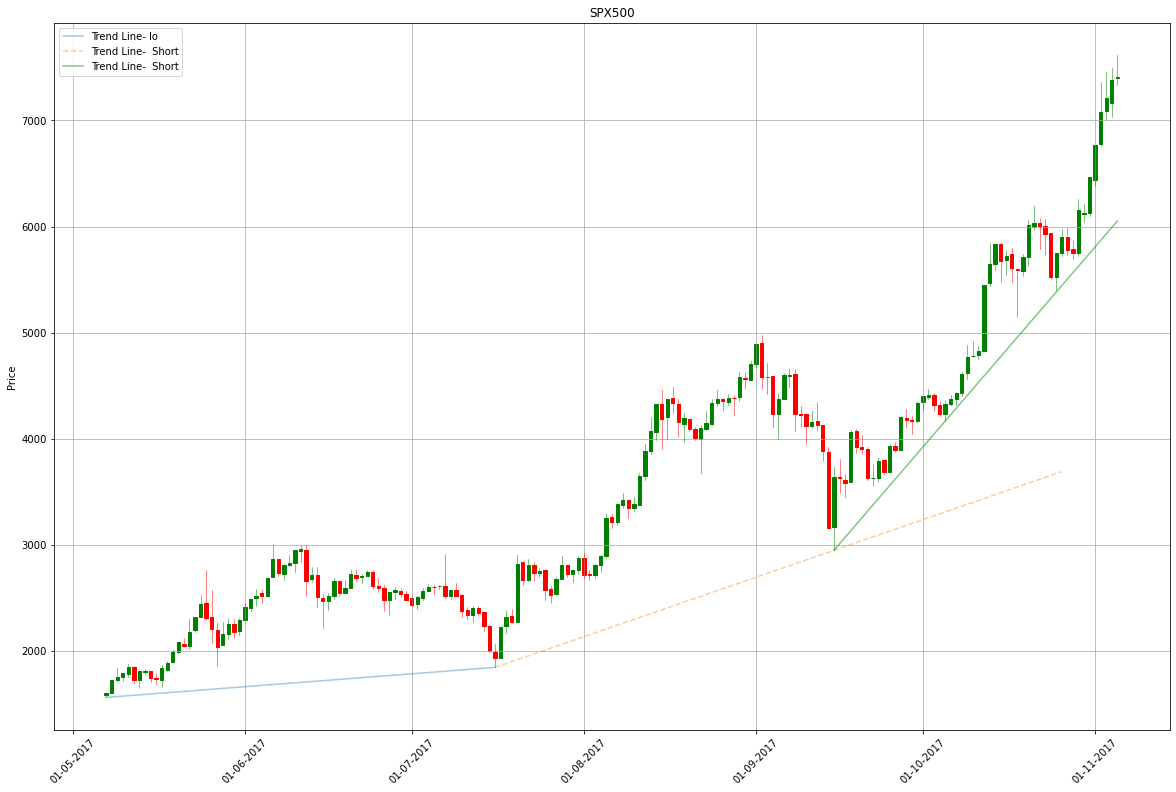

In [55]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
#ax5 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
ax3.plot(X_mid1, Y_mid1, '--', label='Trend Line-  Short', alpha = 0.4)
ax4.plot(X_mid2, Y_mid2, label='Trend Line-  Short', alpha = 0.6)
#ax5.plot(X_long2, Y_long2, label='Trend Line- lo', alpha = 0.4)

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [23]:
df1

,index,Open,High,Low,Close,Volume
0,17323.0,2690.840088,2999.909912,2690.840088,2863.199951,2.089610e+09
1,17324.0,2869.379883,2869.379883,2700.560059,2732.159912,1.517710e+09
2,17325.0,2720.489990,2815.300049,2670.949951,2805.620117,1.281170e+09
3,17326.0,2807.439941,2901.709961,2795.620117,2823.810059,1.348950e+09
4,17327.0,2828.139893,2950.989990,2746.550049,2947.709961,2.018890e+09
...,...,...,...,...,...,...
178,17501.0,10198.599609,11046.700195,9694.650391,10975.599609,6.783120e+09
179,17502.0,10978.299805,11320.200195,10905.099609,11074.599609,5.138500e+09
180,17503.0,11082.700195,11858.700195,10862.000000,11323.200195,6.608310e+09
181,17504.0,11315.400391,11657.200195,11081.799805,11657.200195,6.132410e+09


In [40]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

if Min_pozycja > Max_pozycja:
    
    print('ok')
    
else:
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]

    
    Bx = df1.iloc[Min_pozycja+1].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    for i in range((Bx).astype(int),Max_idx.astype(int)):
        
        df11 = df1[B[0]:Max_idx]
        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good ==sum:
            print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
            print(f'Trend spadkowy. Punkt A : {A}, punkt C: {B}')
            break
            
        else:
            
            df11 = df11[A[0]+1:Max_idx]
            
            
            while len(df11)>2:
                
                Bx = df11.iloc[0].name
                By = df11['Low'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx
                
                


KeyboardInterrupt: 

In [8]:
Max_idx = df1.iloc[Max_pozycja].name
Ax = df1.iloc[Min_pozycja].name
Ay = df1['Low'].loc[Ax]
A = [Ax, Ay]

Bx = df1.iloc[Min_pozycja+1].name
By = df1['Low'].loc[Bx]
B = [Bx, By]
    
a = (Ay-By)/(Ax-Bx)
b = By - a*Bx
    
df11 = df1[A[0]:Max_idx]
df11['Pozycja na LT'] = df11.index * a + b
df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
good = df11['check'][df11['check']>=0].count()
sum = len(df11['check'])

if good == sum:
    print('ok')
else:
    Bx = df1.iloc[Min_pozycja+2].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11 = df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    if good ==sum:
    

In [6]:
Min_pozycja

0

In [7]:
Max_pozycja

73

In [8]:
len(df1)-20

346

In [34]:
for i in range((A[0]-1).astype(int),Max_idx.astype(int)):
       
        df1['Pozycja na LT'] = df1.index * a + b
        df1['check']= round(df1['Low'] - df1['Pozycja na LT'],0)
        good = df1['check'][df1['check']>=0].count()
        sum = len(df1['check'])

        if good == sum:
            print(f'Najniższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Min_pozycja}')
            print(f'Trend Wzrostowy. Punkt A : {A}, punkt C: {C}')
            break

        else:

            Max_idx = df1.iloc[Max_pozycja].name
            Ax = df1.iloc[Min_pozycja].name
            Ay = df1['Low'].loc[Ax]
            A = [Ax, Ay]

            Bx = df1.iloc[Min_pozycja].name + 2
            By = df1['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            Cx = df1.index.max() +90
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]

In [28]:
C

[17899.0, 75362.44070499949]

In [29]:
A

[17444.0, 4164.049805]

In [30]:
df1

,Open,High,Low,Close,Volume,Pozycja na LT,check
17444.0,4229.879883,4362.640137,4164.049805,4328.410156,1.161770e+09,4164.049805,0.0
17445.0,4324.459961,4413.270020,4320.529785,4370.810059,1.069940e+09,4320.529785,0.0
17446.0,4369.350098,4443.879883,4321.049805,4426.890137,9.069280e+08,4477.009765,-156.0
17447.0,4429.669922,4624.140137,4405.640137,4610.479980,1.313870e+09,4633.489745,-228.0
17448.0,4614.520020,4878.709961,4564.250000,4772.020020,1.968740e+09,4789.969725,-226.0
...,...,...,...,...,...,...,...
17805.0,6619.850098,6653.299805,6549.080078,6589.620117,4.000970e+09,60653.322585,-54104.0
17806.0,6593.240234,6611.839844,6537.899902,6556.100098,3.979260e+09,60809.802565,-54272.0
17807.0,6553.859863,6571.459961,6454.029785,6502.589844,3.887310e+09,60966.282545,-54512.0
17808.0,6497.910156,6603.310059,6497.910156,6576.689941,3.838410e+09,61122.762525,-54625.0
